<!-- # Facebook Comments Dataset Processing

This notebook loads and cleans the Rinconada Facebook Comments dataset by:
1. Loading the CSV file
2. Removing blank instances (rows with empty comments)
3. Removing the 3rd column (Label status column)
4. Displaying the cleaned dataset -->

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

In [ ]:
# Load the dataset
csv_file_path = r"C:\Users\AIRCoDe-Guest\Documents\datasets_code\DATASETS_RBL - combined_dataset_all.csv"

try:
    # Load the CSV file
    df = pd.read_csv(csv_file_path)
    print(f"Dataset loaded successfully!")
    print(f"Shape of the original dataset: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    
    # Display first few rows
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
    
except FileNotFoundError:
    print(f"File not found at: {csv_file_path}")
    print("Please check the file path and try again.")
except Exception as e:
    print(f"Error loading the dataset: {e}")

DATASET CLEANING


In [ ]:
# # Clean the dataset

# # Remove the 3rd column (assuming it's the "Labeled" column)
# print("Original columns:", df.columns.tolist())

# # Drop the 3rd column (index 2)
# if df.shape[1] >= 3:
#     column_to_drop = df.columns[2]  # Get the name of the 3rd column
#     df_cleaned = df.drop(columns=[column_to_drop])
#     print(f"Dropped column: '{column_to_drop}'")
# else:
#     df_cleaned = df.copy()
#     print("Dataset has less than 3 columns, no column dropped")

# print("Columns after dropping 3rd column:", df_cleaned.columns.tolist())

# # Remove any columns named 'Unnamed' or 'untitled' (case-insensitive)
# cols_to_remove = [col for col in df_cleaned.columns if col.lower().startswith('unnamed') or col.lower().startswith('untitled')]
# if cols_to_remove:
#     df_cleaned = df_cleaned.drop(columns=cols_to_remove)
#     print(f"Dropped columns: {cols_to_remove}")

# # Keep only 'cleaned_comment' and 'Label' columns if they exist
# final_columns = [col for col in ['cleaned_comment', 'Label'] if col in df_cleaned.columns]
# df_cleaned = df_cleaned[final_columns]
# print(f"Columns after keeping only cleaned_comment and Label: {df_cleaned.columns.tolist()}")

# # Remove blank instances (rows where the first column - comments - is empty/null)
# initial_shape = df_cleaned.shape
# comment_column = 'cleaned_comment' if 'cleaned_comment' in df_cleaned.columns else df_cleaned.columns[0]

# # Remove rows where the comment column is empty, null, or contains only whitespace
# df_cleaned = df_cleaned.dropna(subset=[comment_column])  # Remove null values
# df_cleaned = df_cleaned[df_cleaned[comment_column].str.strip() != '']  # Remove empty strings and whitespace-only

# final_shape = df_cleaned.shape
# removed_rows = initial_shape[0] - final_shape[0]

# print(f"\nData cleaning summary:")
# print(f"Original dataset shape: {initial_shape}")
# print(f"Final dataset shape: {final_shape}")
# print(f"Removed {removed_rows} blank instances")

# # Display the cleaned dataset info
# print(f"\nCleaned dataset info:")
# print(f"Shape: {df_cleaned.shape}")
# print(f"Columns: {df_cleaned.columns.tolist()}")
# print(f"\nFirst 10 rows of cleaned dataset:")
# print(df_cleaned.head(10))

SAVING DATASET


In [ ]:
# # Final dataset summary
# print("="*50)
# print("FINAL CLEANED DATASET SUMMARY")
# print("="*50)
# print(f"Final shape: {df_cleaned.shape}")
# print(f"Columns: {df_cleaned.columns.tolist()}")
# print(f"Data types:")
# print(df_cleaned.dtypes)
# print(f"\nSample of cleaned data:")
# print(df_cleaned.head(3))
# print(f"\nNumber of non-null values per column:")
# print(df_cleaned.count())

# # Save the cleaned dataset
# df_cleaned.to_csv('cleaned_dataset_LATEST.csv', index=False)
# print("\nCleaned dataset saved as 'cleaned_dataset_LATEST.csv'")

LOWERCASE DATASET

In [29]:
# Convert labels to lowercase
print("Converting labels to lowercase...")
print("Original unique labels:", df['Label'].unique())

# Convert all labels to lowercase
df['Label'] = df['Label'].str.lower()

print("Labels after conversion:", df['Label'].unique())
print(f"\nSample of data with lowercase labels:")
print(df.head())

# Check for any null values in Label column
print(f"\nNumber of null values in Label column: {df['Label'].isnull().sum()}")

# Save the updated dataset with lowercase labels
df.to_csv('cleaned_dataset_latest_lowercase.csv', index=False)
print("\nDataset with lowercase labels saved as 'cleaned_dataset.csv'")

Converting labels to lowercase...
Original unique labels: ['positive' 'negative' 'neutral']
Labels after conversion: ['positive' 'negative' 'neutral']

Sample of data with lowercase labels:
                                           Sentiment     Label
0                        magmaan po a mga igin ninyo  positive
1                            mahiwason ang rinconada  positive
2         simpleng pag uran baha nanaman sadi lriga.  negative
3  uda karapatan mag reklamo lalo na kadaklan ka ...  negative
4                maray kin su iba diri man apektado.  negative

Number of null values in Label column: 0

Dataset with lowercase labels saved as 'cleaned_dataset.csv'


CLEANING AGAIN

In [32]:
# Clean the CSV file - Remove blank instances and "Labeled" column
print("Cleaning the CSV file...")

# Reload the current CSV to see its structure
df_current = pd.read_csv('cleaned_dataset_latest_lowercase.csv')
print(f"Current dataset shape: {df_current.shape}")
print(f"Current columns: {df_current.columns.tolist()}")

# # Remove the "Labeled" column if it exists
# if 'Labeled' in df_current.columns:
#     df_final = df_current.drop(columns=['Labeled'])
#     print("Removed 'Labeled' column")
# else:
#     df_final = df_current.copy()
#     print("No 'Labeled' column found")

# Remove blank instances (rows where Sentiment is empty or null)
initial_rows = len(df_final)
df_final = df_final.dropna(subset=['Sentiment'])  # Remove null values
df_final = df_final[df_final['Sentiment'].str.strip() != '']  # Remove empty strings

final_rows = len(df_final)
removed_blank_rows = initial_rows - final_rows

print(f"\nCleaning summary:")
print(f"Initial rows: {initial_rows}")
print(f"Final rows: {final_rows}")
print(f"Removed {removed_blank_rows} blank instances")

print(f"\nFinal dataset info:")
print(f"Shape: {df_final.shape}")
print(f"Columns: {df_final.columns.tolist()}")

# Check for any remaining null values
print(f"\nNull values per column:")
print(df_final.isnull().sum())

# Save the final cleaned dataset
df_final.to_csv('cleaned_dataset_latest_lowercase_cleaned.csv', index=False)
print(f"\nFinal cleaned dataset saved to 'cleaned_dataset_latest_lowercase_cleaned.csv'")
print(f"Sample of final data:")
print(df_final.head())

Cleaning the CSV file...
Current dataset shape: (22119, 2)
Current columns: ['Sentiment', 'Label']

Cleaning summary:
Initial rows: 22119
Final rows: 22119
Removed 0 blank instances

Final dataset info:
Shape: (22119, 2)
Columns: ['Sentiment', 'Label']

Null values per column:
Sentiment    0
Label        0
dtype: int64

Final cleaned dataset saved to 'cleaned_dataset_latest_lowercase_cleaned.csv'
Sample of final data:
                                           Sentiment     Label
0                        magmaan po a mga igin ninyo  positive
1                            mahiwason ang rinconada  positive
2         simpleng pag uran baha nanaman sadi lriga.  negative
3  uda karapatan mag reklamo lalo na kadaklan ka ...  negative
4                maray kin su iba diri man apektado.  negative


DATASET COMBINE

In [ ]:
# # Combine the two datasets
# print("Combining the two datasets...")

# # Load the second dataset (RBL_Sentences_Labelled)
# rbl_file_path = r"C:\Users\Joshua Ean\Downloads\Rinconada_FB_Comments - RBL_Sentences_Labelled.csv"

# try:
#     df_rbl = pd.read_csv(rbl_file_path)
#     print(f"RBL dataset loaded successfully!")
#     print(f"RBL dataset shape: {df_rbl.shape}")
#     print(f"RBL columns: {df_rbl.columns.tolist()}")
#     print(f"Sample of RBL data:")
#     print(df_rbl.head())
    
# except FileNotFoundError:
#     print(f"RBL file not found at: {rbl_file_path}")
# except Exception as e:
#     print(f"Error loading RBL dataset: {e}")

# # Rename columns to standardize them
# # For the cleaned Facebook comments dataset
# df_fb_renamed = df_final.copy()
# df_fb_renamed.columns = ['Sentiment', 'Label']

# # For the RBL dataset  
# df_rbl_renamed = df_rbl.copy()
# df_rbl_renamed.columns = ['Sentiment', 'Label']

# print(f"\nDataset 1 (Facebook Comments):")
# print(f"Shape: {df_fb_renamed.shape}")
# print(f"Columns: {df_fb_renamed.columns.tolist()}")
# print(f"Unique labels: {df_fb_renamed['Label'].unique()}")

# print(f"\nDataset 2 (RBL Sentences):")
# print(f"Shape: {df_rbl_renamed.shape}")
# print(f"Columns: {df_rbl_renamed.columns.tolist()}")
# print(f"Unique labels: {df_rbl_renamed['Label'].unique()}")

# # Combine the datasets
# combined_dataset = pd.concat([df_fb_renamed, df_rbl_renamed], ignore_index=True)

# print(f"\nCombined dataset:")
# print(f"Shape: {combined_dataset.shape}")
# print(f"Columns: {combined_dataset.columns.tolist()}")
# print(f"Unique labels: {combined_dataset['Label'].unique()}")

# # Check for null values
# print(f"\nNull values in combined dataset:")
# print(combined_dataset.isnull().sum())

# # Remove any rows with null sentiments
# combined_dataset = combined_dataset.dropna(subset=['Sentiment'])
# combined_dataset = combined_dataset[combined_dataset['Sentiment'].str.strip() != '']

# print(f"\nAfter removing null/empty sentiments:")
# print(f"Final shape: {combined_dataset.shape}")

# # Display sample of combined data
# print(f"\nSample of combined dataset:")
# print(combined_dataset.head(10))

# # Save the combined dataset
# combined_dataset.to_csv('combined_dataset_all.csv', index=False)
# print(f"\nCombined dataset saved as 'combined_dataset_all.csv'")

# # Show final statistics
# print(f"\nFinal dataset statistics:")
# print(f"Total records: {len(combined_dataset)}")
# print(f"Label distribution:")
# print(combined_dataset['Label'].value_counts())

SUMMARY

In [33]:
# Summary of the combined training dataset
print("="*60)
print("TRAINING DATASET SUMMARY")
print("="*60)

# Load the saved file to verify
training_df = pd.read_csv('cleaned_dataset_latest_lowercase_cleaned.csv')

print(f"Dataset shape: {training_df.shape}")
print(f"Columns: {training_df.columns.tolist()}")

print(f"\nLabel distribution:")
label_counts = training_df['Label'].value_counts()
print(label_counts)

print(f"\nPercentage distribution:")
label_percentages = training_df['Label'].value_counts(normalize=True) * 100
for label, percentage in label_percentages.items():
    print(f"{label}: {percentage:.2f}%")

print(f"\nNull values check:")
print(training_df.isnull().sum())

print(f"\nSample records from combined dataset:")
print(training_df.head())

print(f"\nDataset successfully saved as 'training_dataset_trial.csv'")
print(f"Ready for machine learning model training!")

TRAINING DATASET SUMMARY
Dataset shape: (22119, 2)
Columns: ['Sentiment', 'Label']

Label distribution:
Label
neutral     11774
positive     6242
negative     4103
Name: count, dtype: int64

Percentage distribution:
neutral: 53.23%
positive: 28.22%
negative: 18.55%

Null values check:
Sentiment    0
Label        0
dtype: int64

Sample records from combined dataset:
                                           Sentiment     Label
0                        magmaan po a mga igin ninyo  positive
1                            mahiwason ang rinconada  positive
2         simpleng pag uran baha nanaman sadi lriga.  negative
3  uda karapatan mag reklamo lalo na kadaklan ka ...  negative
4                maray kin su iba diri man apektado.  negative

Dataset successfully saved as 'training_dataset_trial.csv'
Ready for machine learning model training!


VISUALIZATION

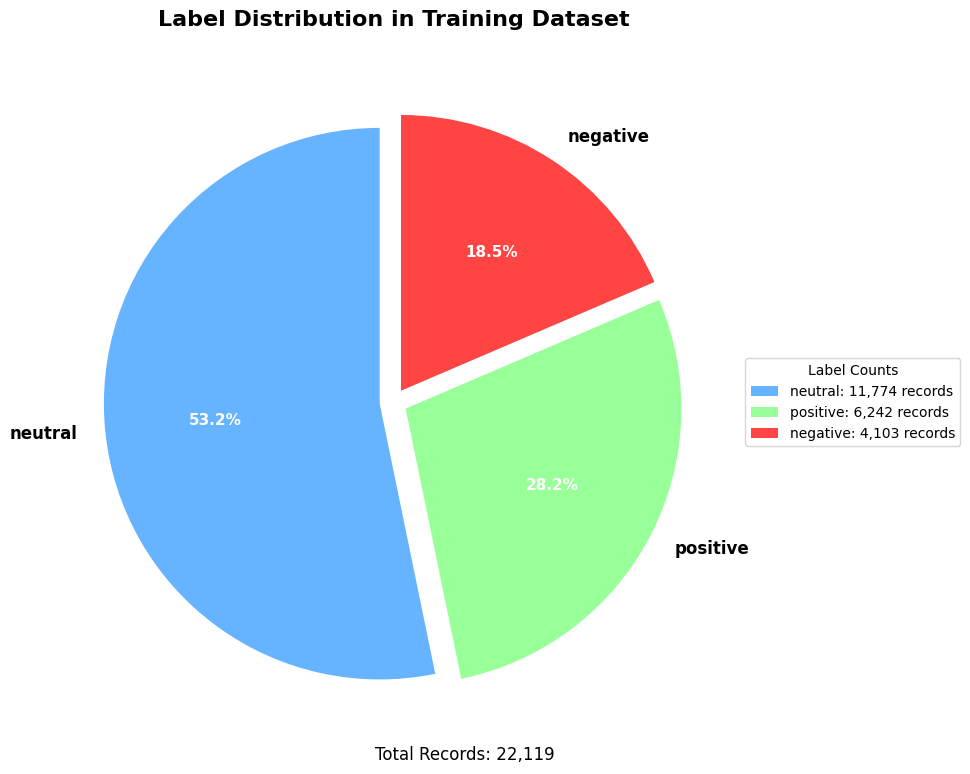

DETAILED LABEL STATISTICS
Total Records: 22,119

Label Distribution:
  Neutral: 11,774 records (53.23%)
  Positive: 6,242 records (28.22%)
  Negative: 4,103 records (18.55%)

Dataset Balance Analysis:
  Most frequent label: neutral (11,774 records)
  Least frequent label: negative (4,103 records)
  Balance ratio (max/min): 2.87
  ✅ Dataset is reasonably balanced


In [35]:
# Visualize label distribution with pie chart
import matplotlib.pyplot as plt

# Load the training dataset
training_df = pd.read_csv('DATASET_FINAL.csv')

# Get label counts
label_counts = training_df['Label'].value_counts()

# Create figure and pie chart
plt.figure(figsize=(10, 8))
colors = ['#66b3ff', '#99ff99', '#ff4444']  # Blue for neutral, Green for positive, Red for negative

# Create pie chart
wedges, texts, autotexts = plt.pie(label_counts.values, 
                                   labels=label_counts.index, 
                                   autopct='%1.1f%%',
                                   colors=colors,
                                   startangle=90,
                                   explode=(0.05, 0.05, 0.05))  # Slightly separate slices

# Customize the chart
plt.title('Label Distribution in Training Dataset\n', fontsize=16, fontweight='bold')

# Add total count as subtitle
total_rows = len(training_df)
plt.suptitle(f'Total Records: {total_rows:,}', fontsize=12, y=0.02)

# Enhance text appearance
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')

# Add legend with counts
legend_labels = [f'{label}: {count:,} records' for label, count in zip(label_counts.index, label_counts.values)]
plt.legend(wedges, legend_labels, title="Label Counts", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

# Print detailed statistics
print("="*50)
print("DETAILED LABEL STATISTICS")
print("="*50)
print(f"Total Records: {total_rows:,}")
print("\nLabel Distribution:")
for label, count in label_counts.items():
    percentage = (count / total_rows) * 100
    print(f"  {label.capitalize()}: {count:,} records ({percentage:.2f}%)")

print(f"\nDataset Balance Analysis:")
max_count = label_counts.max()
min_count = label_counts.min()
balance_ratio = max_count / min_count
print(f"  Most frequent label: {label_counts.idxmax()} ({max_count:,} records)")
print(f"  Least frequent label: {label_counts.idxmin()} ({min_count:,} records)")
print(f"  Balance ratio (max/min): {balance_ratio:.2f}")

if balance_ratio > 3:
    print("  ⚠️  Dataset is moderately imbalanced - consider balancing techniques")
elif balance_ratio > 5:
    print("  ⚠️  Dataset is highly imbalanced - balancing techniques recommended")
else:
    print("  ✅ Dataset is reasonably balanced")

In [36]:
# Remove stopwords from the training dataset
import re

print("Loading stopwords and cleaning training dataset...")

# Load the RBL Nabua stopwords
stopwords_file_path = r"C:\Users\AIRCoDe-Guest\Documents\datasets_code\DATASETS_RBL - RBL Nabua Stop Words.csv"

try:
    # Load stopwords from CSV file
    stopwords_df = pd.read_csv(stopwords_file_path, header=None, names=['stopword'])
    stopwords_list = stopwords_df['stopword'].str.strip().str.lower().tolist()
    
    print(f"Loaded {len(stopwords_list)} stopwords")
    print(f"Sample stopwords: {stopwords_list[:10]}")
    
except FileNotFoundError:
    print(f"Stopwords file not found at: {stopwords_file_path}")
    stopwords_list = []
except Exception as e:
    print(f"Error loading stopwords: {e}")
    stopwords_list = []

# Load the training dataset
training_df = pd.read_csv('DATASET_FINAL.csv')
print(f"\nOriginal dataset shape: {training_df.shape}")

# Function to remove stopwords from text
def remove_stopwords(text):
    if pd.isna(text):
        return text
    
    # Convert to lowercase and split into words
    words = re.findall(r'\b\w+\b', str(text).lower())
    
    # Remove stopwords
    filtered_words = [word for word in words if word not in stopwords_list]
    
    # Join the remaining words
    return ' '.join(filtered_words)

# Apply stopword removal to the Sentiment column
print("\nRemoving stopwords from sentiment text...")
training_df['Sentiment_cleaned'] = training_df['Sentiment'].apply(remove_stopwords)

# Remove rows that became empty after stopword removal
initial_rows = len(training_df)
training_df = training_df[training_df['Sentiment_cleaned'].str.strip() != '']
training_df = training_df.dropna(subset=['Sentiment_cleaned'])
final_rows = len(training_df)

print(f"Removed {initial_rows - final_rows} rows that became empty after stopword removal")

# Show examples of before and after
print(f"\nExamples of stopword removal:")
print("="*80)
for i in range(5):
    if i < len(training_df):
        original = training_df.iloc[i]['Sentiment']
        cleaned = training_df.iloc[i]['Sentiment_cleaned']
        label = training_df.iloc[i]['Label']
        
        print(f"Original:  {original}")
        print(f"Cleaned:   {cleaned}")
        print(f"Label:     {label}")
        print("-" * 40)

# Replace the original Sentiment column with cleaned version
training_df['Sentiment'] = training_df['Sentiment_cleaned']
training_df = training_df.drop(columns=['Sentiment_cleaned'])

print(f"\nFinal dataset shape after stopword removal: {training_df.shape}")

# Save the cleaned dataset
output_file = 'DATASET_FINAL_NO_STOPWORDS.csv'
training_df.to_csv(output_file, index=False)
print(f"Dataset with stopwords removed saved as '{output_file}'")

# Show final statistics
print(f"\nFinal dataset statistics:")
print(f"Total records: {len(training_df)}")
print(f"Label distribution:")
print(training_df['Label'].value_counts())

# Show sample of final cleaned data
print(f"\nSample of cleaned dataset:")
print(training_df.head())

Loading stopwords and cleaning training dataset...
Loaded 448 stopwords
Sample stopwords: ['sa', 'a', 'na', 'ka', 'mga', 'mo', 'saka', 'o', 'su', 'adi']

Original dataset shape: (22119, 2)

Removing stopwords from sentiment text...
Removed 535 rows that became empty after stopword removal

Examples of stopword removal:
Original:  magmaan po a mga igin ninyo
Cleaned:   magmaan
Label:     positive
----------------------------------------
Original:  mahiwason ang rinconada
Cleaned:   mahiwason
Label:     positive
----------------------------------------
Original:  simpleng pag uran baha nanaman sadi lriga.
Cleaned:   simpleng baha nanaman lriga
Label:     negative
----------------------------------------
Original:  uda karapatan mag reklamo lalo na kadaklan ka mga taga rinconada ta bayad kamo hanggang 3 taon sa halagang 2,500,
Cleaned:   uda karapatan reklamo kadaklan bayad 3 taon halagang 2 500
Label:     negative
----------------------------------------
Original:  maray kin su iba diri 

In [37]:
# Summary of stopword removal process
print("="*60)
print("STOPWORD REMOVAL SUMMARY")
print("="*60)

# Load both datasets for comparison
original_df = pd.read_csv('DATASET_FINAL.csv')
cleaned_df = pd.read_csv('DATASET_FINAL_NO_STOPWORDS.csv')

print(f"Original dataset size: {len(original_df):,} records")
print(f"Cleaned dataset size: {len(cleaned_df):,} records")
print(f"Records removed: {len(original_df) - len(cleaned_df):,}")

# Calculate average text length before and after
original_avg_length = original_df['Sentiment'].str.len().mean()
cleaned_avg_length = cleaned_df['Sentiment'].str.len().mean()

print(f"\nAverage text length:")
print(f"Before stopword removal: {original_avg_length:.1f} characters")
print(f"After stopword removal: {cleaned_avg_length:.1f} characters")
print(f"Average reduction: {original_avg_length - cleaned_avg_length:.1f} characters ({((original_avg_length - cleaned_avg_length) / original_avg_length * 100):.1f}%)")

# Show word count comparison
original_word_count = original_df['Sentiment'].str.split().str.len().mean()
cleaned_word_count = cleaned_df['Sentiment'].str.split().str.len().mean()

print(f"\nAverage word count:")
print(f"Before stopword removal: {original_word_count:.1f} words")
print(f"After stopword removal: {cleaned_word_count:.1f} words")
print(f"Average word reduction: {original_word_count - cleaned_word_count:.1f} words ({((original_word_count - cleaned_word_count) / original_word_count * 100):.1f}%)")

# Label distribution comparison
print(f"\nLabel distribution after cleaning:")
print(cleaned_df['Label'].value_counts())

print(f"\nFiles saved:")
print(f"✅ Original combined dataset: 'training_dataset_trial.csv'")
print(f"✅ Stopwords removed dataset: 'training_dataset_no_stopwords.csv'")
print(f"\nDatasets are ready for machine learning model training!")

STOPWORD REMOVAL SUMMARY
Original dataset size: 22,119 records
Cleaned dataset size: 21,584 records
Records removed: 535

Average text length:
Before stopword removal: 55.2 characters
After stopword removal: 30.6 characters
Average reduction: 24.6 characters (44.6%)

Average word count:
Before stopword removal: 9.7 words
After stopword removal: 4.2 words
Average word reduction: 5.6 words (57.2%)

Label distribution after cleaning:
Label
neutral     11330
positive     6157
negative     4097
Name: count, dtype: int64

Files saved:
✅ Original combined dataset: 'training_dataset_trial.csv'
✅ Stopwords removed dataset: 'training_dataset_no_stopwords.csv'

Datasets are ready for machine learning model training!


FREQUENCY ANALYSIS
Total words in dataset: 89,803
Unique words: 22,774

Top 20 most frequent words:
----------------------------------------
 1. diri            : 1,031 times
 2. tamang          : 569 times
 3. uda             : 508 times
 4. maray           : 498 times
 5. pagsasanay      : 363 times
 6. kaipuwan        : 341 times
 7. mas             : 261 times
 8. tama            : 217 times
 9. pirmi           : 201 times
10. naturan         : 190 times
11. alduw           : 188 times
12. sadit           : 173 times
13. kaiba           : 162 times
14. pwede           : 156 times
15. answer          : 154 times
16. aldow           : 153 times
17. arug            : 148 times
18. ayam            : 137 times
19. sige            : 136 times
20. gustong         : 126 times


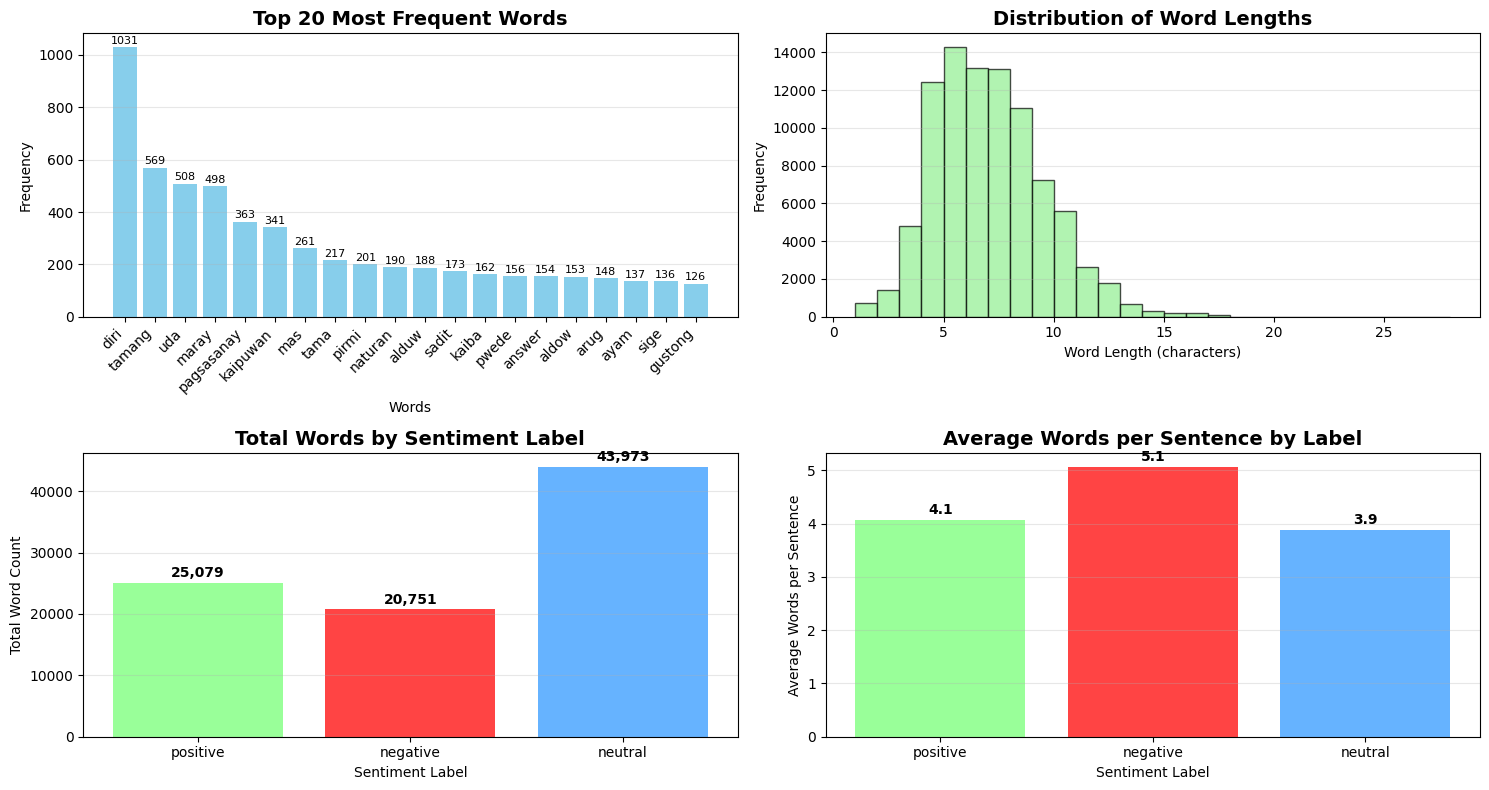


FREQUENCY ANALYSIS BY SENTIMENT LABEL

POSITIVE SENTIMENT:
------------------------------
Total words: 25,079
Unique words: 9,477
Top 10 words:
   1. maray        :  253 times (1.0%)
   2. diri         :  212 times (0.8%)
   3. pagsasanay   :  144 times (0.6%)
   4. tamang       :  103 times (0.4%)
   5. pirmi        :   97 times (0.4%)
   6. mas          :   97 times (0.4%)
   7. alduw        :   94 times (0.4%)
   8. kaipuwan     :   84 times (0.3%)
   9. sigurado     :   83 times (0.3%)
  10. mamumuya     :   73 times (0.3%)

NEGATIVE SENTIMENT:
------------------------------
Total words: 20,751
Unique words: 9,637
Top 10 words:
   1. diri         :  406 times (2.0%)
   2. uda          :  281 times (1.4%)
   3. maray        :   80 times (0.4%)
   4. dai          :   69 times (0.3%)
   5. mas          :   65 times (0.3%)
   6. buko         :   52 times (0.3%)
   7. grabe        :   44 times (0.2%)
   8. mamee        :   44 times (0.2%)
   9. dae          :   43 times (0.2%)
  10. ab

In [38]:
# Frequency Analysis of the Dataset
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

print("="*60)
print("FREQUENCY ANALYSIS")
print("="*60)

# Load the cleaned dataset
cleaned_df = pd.read_csv('DATASET_FINAL_NO_STOPWORDS.csv')

# Combine all text from the sentiment column
all_text = ' '.join(cleaned_df['Sentiment'].astype(str))

# Split into words and count frequencies
words = re.findall(r'\b\w+\b', all_text.lower())
word_freq = Counter(words)

print(f"Total words in dataset: {len(words):,}")
print(f"Unique words: {len(word_freq):,}")

# Top 20 most frequent words
top_words = word_freq.most_common(20)
print(f"\nTop 20 most frequent words:")
print("-" * 40)
for i, (word, count) in enumerate(top_words, 1):
    print(f"{i:2d}. {word:<15} : {count:,} times")

# Create visualization of top words
plt.figure(figsize=(15, 8))

# Top 20 words bar chart
words_list = [word for word, count in top_words]
counts_list = [count for word, count in top_words]

plt.subplot(2, 2, 1)
bars = plt.bar(range(len(words_list)), counts_list, color='skyblue')
plt.title('Top 20 Most Frequent Words', fontsize=14, fontweight='bold')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(range(len(words_list)), words_list, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add count labels on bars
for bar, count in zip(bars, counts_list):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             str(count), ha='center', va='bottom', fontsize=8)

# Word length distribution
plt.subplot(2, 2, 2)
word_lengths = [len(word) for word in words]
plt.hist(word_lengths, bins=range(1, max(word_lengths)+2), alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Distribution of Word Lengths', fontsize=14, fontweight='bold')
plt.xlabel('Word Length (characters)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)

# Frequency analysis by label
plt.subplot(2, 2, 3)
label_word_counts = {}
for label in cleaned_df['Label'].unique():
    if pd.notna(label):
        label_text = ' '.join(cleaned_df[cleaned_df['Label'] == label]['Sentiment'].astype(str))
        label_words = re.findall(r'\b\w+\b', label_text.lower())
        label_word_counts[label] = len(label_words)

labels = list(label_word_counts.keys())
word_counts = list(label_word_counts.values())

# Set consistent colors: green for positive, blue for neutral, red for negative
color_map = {'positive': '#99ff99', 'neutral': '#66b3ff', 'negative': '#ff4444'}
colors = [color_map.get(label, '#cccccc') for label in labels]

bars = plt.bar(labels, word_counts, color=colors)
plt.title('Total Words by Sentiment Label', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment Label')
plt.ylabel('Total Word Count')
plt.grid(axis='y', alpha=0.3)

# Add count labels on bars
for bar, count in zip(bars, word_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(word_counts)*0.01,
             f'{count:,}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Average words per sentence by label
plt.subplot(2, 2, 4)
avg_words_per_label = {}
for label in cleaned_df['Label'].unique():
    if pd.notna(label):
        label_data = cleaned_df[cleaned_df['Label'] == label]['Sentiment'].astype(str)
        avg_words = label_data.str.split().str.len().mean()
        avg_words_per_label[label] = avg_words

labels = list(avg_words_per_label.keys())
avg_words = list(avg_words_per_label.values())

# Use the same consistent color mapping
colors_avg = [color_map.get(label, '#cccccc') for label in labels]

bars = plt.bar(labels, avg_words, color=colors_avg)
plt.title('Average Words per Sentence by Label', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment Label')
plt.ylabel('Average Words per Sentence')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, avg in zip(bars, avg_words):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(avg_words)*0.01,
             f'{avg:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Detailed frequency analysis by sentiment label
print(f"\n" + "="*60)
print("FREQUENCY ANALYSIS BY SENTIMENT LABEL")
print("="*60)

for label in cleaned_df['Label'].unique():
    if pd.notna(label):
        print(f"\n{label.upper()} SENTIMENT:")
        print("-" * 30)
        
        # Get text for this label
        label_text = ' '.join(cleaned_df[cleaned_df['Label'] == label]['Sentiment'].astype(str))
        label_words = re.findall(r'\b\w+\b', label_text.lower())
        label_freq = Counter(label_words)
        
        # Top 10 words for this label
        top_label_words = label_freq.most_common(10)
        
        print(f"Total words: {len(label_words):,}")
        print(f"Unique words: {len(label_freq):,}")
        print(f"Top 10 words:")
        
        for i, (word, count) in enumerate(top_label_words, 1):
            percentage = (count / len(label_words)) * 100
            print(f"  {i:2d}. {word:<12} : {count:4d} times ({percentage:.1f}%)")

print(f"\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)

# Overall statistics
print(f"Dataset size: {len(cleaned_df):,} records")
print(f"Total vocabulary size: {len(word_freq):,} unique words")
print(f"Average words per sentence: {len(words) / len(cleaned_df):.1f}")
print(f"Most common word: '{word_freq.most_common(1)[0][0]}' ({word_freq.most_common(1)[0][1]:,} times)")
print(f"Average word length: {sum(len(word) for word in words) / len(words):.1f} characters")